In [5]:
from __future__ import print_function 
import visilibity as vis

# Used to plot the example
import matplotlib.pylab as plt

# Used in the create_cone function
import math

In [6]:
#list of functions in visilibity library
#dir(vis)

In [7]:
#size of the y axis, used to convert arena coordinates to polygon coordinates
#global y_size
y_size = 28

In [8]:
#build the outer boundary of the polygon
def outer(y_up, y_down, x_left, x_right): ## use arena coordinates

    #list points ccw
    a = vis.Point(x_left, y_size - (y_down - 1))    
    b = vis.Point(x_right, y_size - (y_down - 1))
    c = vis.Point(x_right, y_size - (y_up - 1))
    d = vis.Point(x_left, y_size - (y_up - 1))

    # Values for graph
    wall_x = [a.x(), b.x(), c.x(), d.x(), a.x()]
    wall_y = [a.y(), b.y(), c.y(), d.y(), a.y()]
    
    # Create the outer boundary polygon
    walls = vis.Polygon([a, b, c, d])
    
    return wall_x, wall_y, walls
    

In [9]:
#build the polygon holes
def hole(y_up, y_down, x_left, x_right): ## use arena coordinates
    
    #points are listed in cc order
    #list points cw
    a = vis.Point(x_left, y_size - (y_down-1))
    b = vis.Point(x_left, y_size - (y_up-1))
    c = vis.Point(x_right, y_size - (y_up-1))
    d = vis.Point(x_right, y_size - (y_down-1))
        
    # values for graph\
    hole_x = [a.x(), b.x(), c.x(), d.x(), a.x()]
    hole_y = [a.y(), b.y(), c.y(), d.y(), a.y()]
    
   # Create the hole polygon
    hole = vis.Polygon([a, b, c, d])
    
    return hole_x, hole_y, hole
    

In [10]:
#build center diamond polygon
#list points cw
p1 =vis.Point(24, 16)
p2 =vis.Point(23, 15)
p3 =vis.Point(23, 14)
p4 =vis.Point(24, 13)
p5 =vis.Point(25, 13)
p6 =vis.Point(26, 14)
p7 =vis.Point(26, 15)
p8 =vis.Point(25, 16)


# Load the values of the hole polygon in order to draw it later
diam_x = [p2.x(), p3.x(), p4.x(), p5.x(), p6.x(), p7.x(), p8.x(), p1.x(), p2.x()]
diam_y = [p2.y(), p3.y(), p4.y(), p5.y(), p6.y(), p7.y(), p8.y(), p1.y(), p2.y()]

# Create the hole polygon
diam = vis.Polygon([p2, p3, p4, p5, p6, p7, p8, p1])


In [11]:
#point location (for robots)
def a_point(x,y): #input arena coordinates
    return vis.Point(x, y_size - (y - 1))   


In [12]:
#build the arena
wall_x, wall_y, walls = outer(1,28,1,48)  #y_up, y_down, x_left, x_right, use arena format


huecos_input = [[ 8,  8.1,  2,  7],  #format y_up, y_down, x_left, x_right, use arena format
                [14,   15, 11, 14],
                [22,   27, 10, 11],
                [ 7,    8, 22, 27],
                [21,   22, 22, 27],
                [14,   15, 35, 38],
                [21, 21.1, 42, 47],
                [ 2,    7, 38, 39],
               ]
huecos = []
for item in huecos_input:
    huecos.append(hole(item[0], item[1], item[2], item[3]))
    

In [13]:
# build and validate environment
# Define an epsilon value (should be != 0.0)
epsilon = 0.0000001

# Create environment, wall will be the outer boundary because
# is the first polygon in the list. The other polygons will be holes

env = vis.Environment([walls, 
                       huecos[0][2], 
                       huecos[1][2], 
                       huecos[2][2], 
                       huecos[3][2], 
                       huecos[4][2], 
                       huecos[5][2], 
                       huecos[6][2], 
                       huecos[7][2], 
                       diam])


In [14]:
#create points location for robots
robot = a_point(5,5)
red = a_point(10,15)
blue = a_point(25,10)
yellow = a_point(3,3)

In [15]:
# create cone polygon representing robot camp of vision
# five inputs(robot, radius, angle, opening, resolution).
#   'robot': is the location of robot
#   'radius': is the longitude from 'robot' camp of vision
#   'angle': is the direcction of the cone. 0 = ->
#   'resolution': is the number of degrees one point and the next in the arc.

def create_cone(robot, radio, angle, opening, resolution=1):
    
    # Define the list for the points of the cone-shape polygon
    p=[]
    
    # The fisrt point will be the vertex of the cone
    p.append(robot)

    # Define the start and end of the arc
    start = angle - opening
    end = angle + opening
    
    for i in range(start, end, resolution):
        
        # Convert start angle from degrees to radians
        rad = math.radians(i)
        
        # Calculate the off-set of the first point of the arc
        x = radio*math.cos(rad)
        y = radio*math.sin(rad)
        
        # Add the off-set to the vertex point
        new_x = robot.x() + x
        new_y = robot.y() + y
        
        # Add the first point of the arc to the list
        p.append( vis.Point(new_x, new_y) )
    
    # Add the last point of the arc
    rad = math.radians(end)
    x = radio*math.cos(rad)
    y = radio*math.sin(rad)
    new_x = robot.x() + x
    new_y = robot.y() + y
    p.append( vis.Point(new_x, new_y) )
    
    return vis.Polygon(p)

In [105]:
#create the cone for our robot
#radius 56 is the diagonal of the arena (ensures all arena in sight)
cone = create_cone(robot, 25, 360, 40, 20) #point, radio, angle, opening, resolution=1):

In [106]:
#create the 360 visibility polygon based on robot location
robot.snap_to_boundary_of(env, epsilon)
robot.snap_to_vertices_of(env, epsilon)

vision360 = vis.Visibility_Polygon(robot, env, epsilon)



In [107]:
def i_see_you(enemy, vision360, cone):
    if enemy._in(vision360, epsilon) and enemy._in(cone, epsilon):
        return True
    

In [108]:
def you_see_me(enemy, vision360):
    if enemy._in(vision360, epsilon):
        return True
    

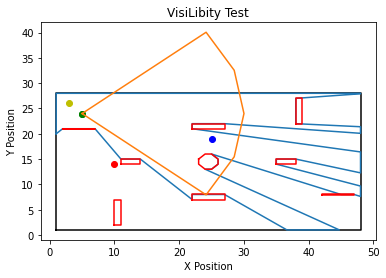

In [109]:

#visualization

def save_print(polygon):
    end_pos_x = []
    end_pos_y = []
    for i in range(polygon.n()):
        x = polygon[i].x()
        y = polygon[i].y()
        
        end_pos_x.append(x)
        end_pos_y.append(y)
                       
    return end_pos_x, end_pos_y 



# vision360 polygon
point_x , point_y  = save_print(vision360)
point_x.append(vision360[0].x())
point_y.append(vision360[0].y())    

# Set the title
plt.title('VisiLibity Test')

# Set the labels for the axis
plt.xlabel('X Position')
plt.ylabel('Y Position')

# Plot the outer boundary with black color
plt.plot(wall_x, wall_y, 'black')

# Plot the position of the observer with a green dot ('go')
plt.plot([robot.x()], [robot.y()], 'go')

# Plot the position of 'end' with a green dot ('go')
plt.plot([red.x()],[red.y()], 'ro')

# Plot the position of 'end_visible' with a green dot ('go')
plt.plot([blue.x()],[blue.y()], 'bo')

plt.plot([yellow.x()], [yellow.y()], 'yo')

# Plot the visibility polygon of 'robot'
plt.plot(point_x, point_y)

# Plot the hole polygon with red color
plt.plot(huecos[0][0], huecos[0][1], 'r')

# Plot the hole polygon with red color
plt.plot(huecos[1][0], huecos[1][1], 'r')

# Plot the hole polygon with red color
plt.plot(huecos[2][0], huecos[2][1], 'r')

# Plot the hole polygon with red color
plt.plot(huecos[3][0], huecos[3][1], 'r')

# Plot the hole polygon with red color
plt.plot(huecos[4][0], huecos[4][1], 'r')

# Plot the hole polygon with red color
plt.plot(huecos[5][0], huecos[5][1], 'r')

# Plot the hole polygon with red color
plt.plot(huecos[6][0], huecos[6][1], 'r')

# Plot the hole polygon with red color
plt.plot(huecos[7][0], huecos[7][1], 'r')

# Plot the hole polygon with red color
plt.plot(diam_x, diam_y, 'r')

# Plot visibility cone
cone_x, cone_y = save_print(cone)
cone_x.append(cone_x[0])
cone_y.append(cone_y[0])
plt.plot([robot.x()], [robot.y()], 'go')
plt.plot(cone_x, cone_y)


# Show the plot
plt.show()
    

In [94]:
#here blue enemy is in sight, red is not, yellow can see me, but I can't see it


In [77]:
i_see_you(blue, vision360, cone) is True

False

In [28]:
you_see_me(blue, vision360) is True

True